# EDA e Análise de Dados



Projeto final

`Análise exploratória de dados de crédito com SQL `

# **Os dados:**


Os dados representam informações de clientes de um banco e contam com as seguintes colunas:



*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = número de dependentes do cliente
*   escolaridade = nível de escolaridade do clientes
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo de cartao do cliente
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
*   iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de credito do cliente
*   valor_transacoes_12m = valor das transações dos ultimos 12 meses
*   qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses




ps: A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset














### **Exploração de dados:**


A fase inicial da análise é entender o que tem em nosso banco de dados.
Vamos a exploração de dados:




**Qual é a quantidade de informações que temos em nossa base de dados?**


Query: SELECT count(*) as informacao from credito;


 **Resposta** : **2564**





ps.: A base de dados do link acima contém mais linhas do que a seleção utilizada. Você pode utilizar todas as linhas ou considerar apenas uma fração dos dados. Na prática, quanto maior a quantidade de dados utilizada, mais confiável a análise! Mas existem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo se torna interessante.

**Visualização dos Dados:**




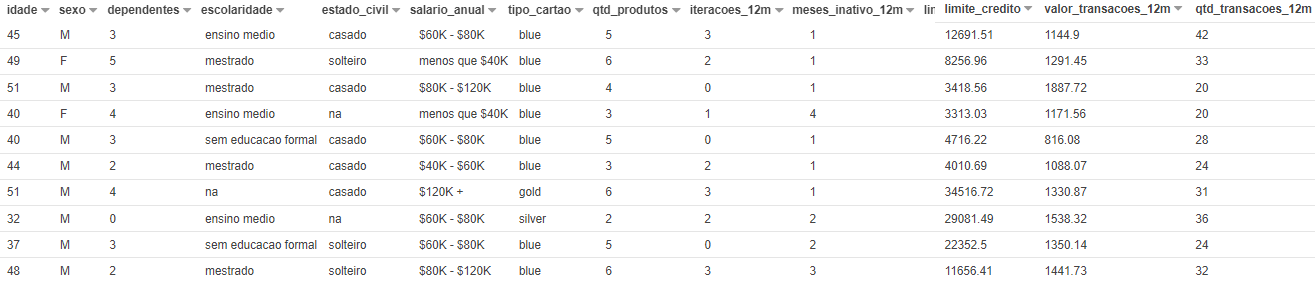

Percebe-se que existem algumas informações nulas na tabela (valor na), vamos analisar mais de perto para os valores de cada coluna!

**Quais são os tipos de cada dado ?**

Query: DESCRIBE credito

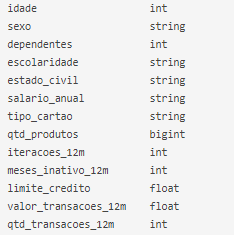



Agora que vimos quais são os tipos de dados, vamos analisar mais atentamente para as varíaveis que não são numéricas.

**Quais são os nivíes de escolaridade disponíveis no dataset?**

Query: SELECT DISTINCT escolaridade from credito;

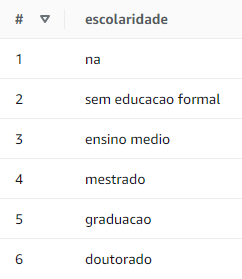


Os dados contam com vários níveis de escolaridade e é notavél que temos valores nulos (na) no dataset, trataremos isso mais tarde!

Vamos analisar se existe mais valores nulos em nosso dataset:

**Quais os tipos de estado_civil em nosso dataset?**

Query: SELECT DISTINCT estado_civil from credito;

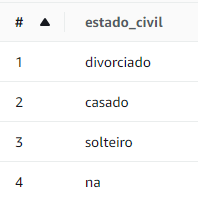




Analisando os dados encontramos mais valores nulos (na) na coluna estado_civil em nosso dataset.

**Quais são os tipos de salario_anual disponíveis no dataset?**

Query : SELECT DISTINCT salario_anual from credito;

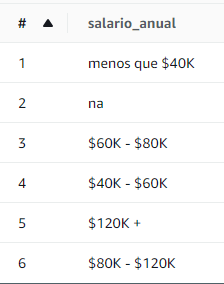

Os salários nesse dataset não estão expostas com o valor exato que o cliente ganha. O que está informado é a faixa salarial de cada um. Também contem dados nulos.

**Quais são os tipos da bandeira dos cartões disponíveis no dataset?**

Query : SELECT DISCTINCT tipo_cartao from credito;


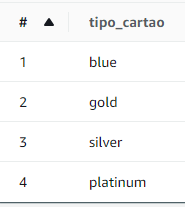

Verificamos que neste dataset não foi encontrado valores nulos ( na).


Analise de Dados

Vamos aprofundar em uma analise mais exploratória para verificarmos as informações em nosso dataset.

**Nas informações abaixo vamos analisar qual a quantidade de cliente e as suas respectivas rendas.**

Query : SELECT count(*) as quant_cliente, salario_anual from credito group by salario_anual;

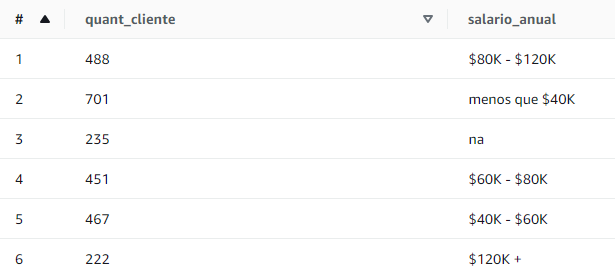

Dada a analise é possivél observar que a maioria dos clientes possui uma renda menor que 40k e 235 clientes não tem informações sobre a renda.
Neste caso seria interessante o Banco atualizar a renda de todos os seus clientes para que possa aumentar os scores de limite de credito e atualizar o banco de dados da propria empresa.

**Vamos analisar qual é o maior público do banco, se é do sexo masculino ou feminino.**

Query: select count(*) as quantidade, sexo from credito group by sexo;

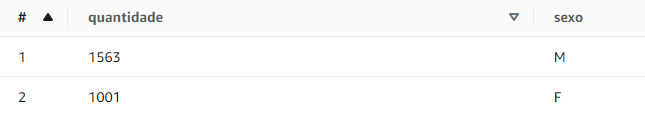


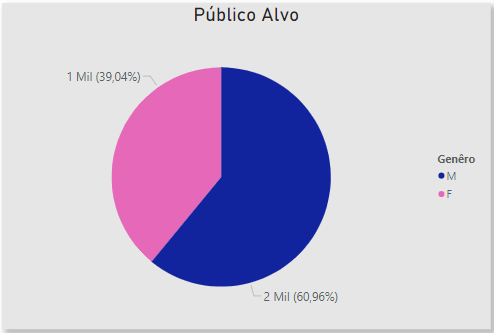


Após a análise o público alvo deste banco é composta pelo sexo masculino.
Extraindo o arquivo em csv foi possivél gerar o grafico de pizza no PBI para melhor visualização.

Verificando as transações de gastos dos clientes.

**Qual  a  maior transação dos clientes?**
**Qual a menor transação dos clientes?**

Query:  select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito;

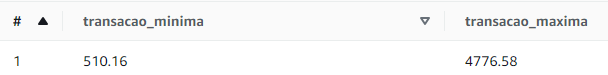

Percebe-se que os valores variam entre 510,00 a 4770,00


**Para entender melhor qual é o perfil do cliente que possuem maiores limites de crédito.**

Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

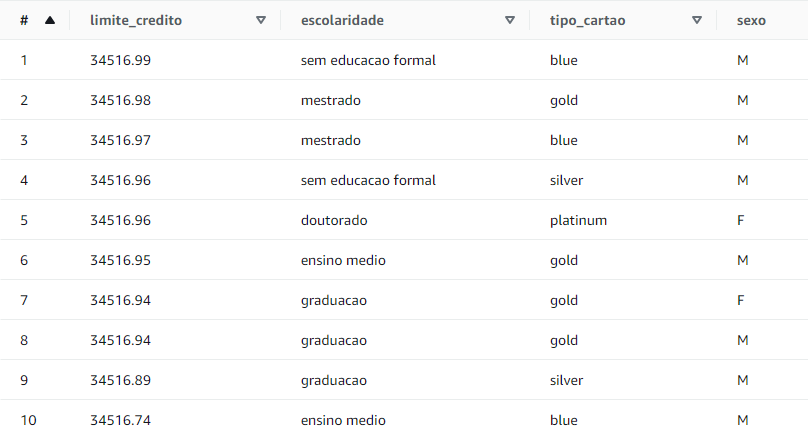

Após analise dos dados, percebemos que o maior limite de credito é para um perfil de ciente do publico masculino e sem escolaridade formal, vimos que a escolaridade aqui neste dataset não impacta no limite de crédito.
As bandeiras dos cartões com maiores limites são: Gold,Silver,Platinum e Blue.


**O salário impacta no limite de crédito?**

Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc;

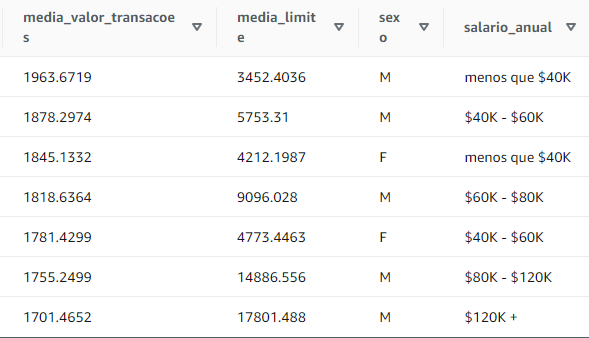

Podemos verificar que quanto menor a renda salarial menor o limite de crédito, para a empresa seria muito interessante a cada seis meses atualizar as rendas dos seus respectivos clientes , para que os mesmos possam estar com suas rendas atualizadas e com scores altos.

# **Conclusão**


Alguns insights interessantes:

Uma parte significativa dos clientes possui renda até 40K

O publico alvo é do sexo masculino

O grau de escolaridade não parece influenciar no limite nem no tipo do cartão

Os clientes com maiores limites são em sua maioria homens

OS clientes com menores limites são em sua maioria mulheres

A faixa salarial impacta diretamente no limite de crédito

Não existem clientes com salário anual acima de 60K do sexo feminino
